# Conclusion

Nous avons essayé la régression logistique avec cross validation et la régularisation.

Le modèle qui sort le mieux est penalty=l2, solver=lbfgs, C=0.1 {'performance_metrics': {'Accuracy': 0.7848648648648648, 'Macro F1 Score': 0.7202194478511635, 'Micro F1 Score': 0.7848648648648648}, 'fairness_metrics': {'TPR_GAP': 0.1891523457770919, 'FPR_GAP': 0.0082020388368326, 'PPR_GAP': 0.023645861203478145}, 'final_score': 0.7655335510370358, 'number_of_estimators': 'N/A'}.

L'analyse révèle un biais de genre significatif, marqué par un TPR_GAP autour de 20%. Ce qui indique une inégalité dans la précision des prédictions entre les genres. Ce biais, en présence d'une précision élevée et de scores F1, suggère que le modèle pourrait privilégier la classe majoritaire. Il est essentiel d'intervenir pour corriger ce biais et assurer des prédictions équitables.

C'est ainsi que nous n'avons pas encore fait un dépot en ligne à cet endroit. Puisqu'on a pensé que lorsqu'on va appliqué les tecniques de réolution de déséquilibre de classe, on arrive à un modèle plus performant tout comme la résolution du biais. Par contre, la meilleure valeure de cross validation  ici nous a permis d'entrainer de partir sur une bonne base ultérieurement.

In [12]:
from modelization import *
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('df.csv')
X_train = df.iloc[:, :768]
Y_train = df.iloc[:, 768]
gender_train = df.iloc[:, 769]

# Régression logistique départ

# Validation croisée
La validation croisée répétée et stratifiée, que je configure avec RepeatedStratifiedKFold avec 10 plis, 3 répétitions, et un état aléatoire fixe, est essentielle pour des performances d'évaluation robustes face à un déséquilibre de classes. Elle assure que chaque pli reflète la distribution de l'ensemble, et la répétition réduit la variabilité des estimations. C'est une bonne pratique pour contrebalancer le déséquilibre et détecter le biais, mais pas pour les corriger.

In [3]:
# Définir le modèle de régression logistique
logistic_clf = LogisticRegression(random_state=42, max_iter=10000, multi_class='multinomial', solver='lbfgs')

# Configurer la stratégie de cross-validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [5]:
# Adapter la fonction aux paramètres attendus
results = train_and_evaluate(logistic_clf, X_train, Y_train, gender_train, cv)

In [7]:
results

(LogisticRegression(max_iter=10000, multi_class='multinomial', random_state=42),
 {'performance_metrics': {'Accuracy': 0.7852252252252252,
   'Macro F1 Score': 0.7059289336752829,
   'Micro F1 Score': 0.7852252252252252},
  'fairness_metrics': {'TPR_GAP': 0.20254228660549817,
   'FPR_GAP': 0.008098179345520519,
   'PPR_GAP': 0.025565832377622118},
  'final_score': 0.7516933235348924,
  'number_of_estimators': 'N/A'})

# Commentaire
Le modèle a une précision de 78.52% et un score F1 macro de 70.59%. Cela montre une amélioration de la performance générale. Le score F1 micro est aussi de 78.52%.  Le score final est de 75.17%, ce qui est bon mais montre qu'il y a place à amélioration, surtout pour réduire les inégalités.

# Commentaire 

Il y a cependant des écarts de justice : le TPR_GAP est de 20.25%, ce qui indique des inégalités entre groupes. Les écarts FPR_GAP et PPR_GAP sont faibles.
Le recours à la pénalisation se justifie par le besoin d'équilibrer le compromis entre la précision et la justice. 

In [9]:
print("Best Model:", results[0])

Best Model: LogisticRegression(max_iter=10000, multi_class='multinomial', random_state=42)


In [10]:
print("Best Metrics:", results[1])

Best Metrics: {'performance_metrics': {'Accuracy': 0.7852252252252252, 'Macro F1 Score': 0.7059289336752829, 'Micro F1 Score': 0.7852252252252252}, 'fairness_metrics': {'TPR_GAP': 0.20254228660549817, 'FPR_GAP': 0.008098179345520519, 'PPR_GAP': 0.025565832377622118}, 'final_score': 0.7516933235348924, 'number_of_estimators': 'N/A'}


In [12]:
best_model = results[0]

In [14]:
train_probabilities = best_model.predict_proba(X_train)
train_probabilities

array([[2.64208760e-04, 9.46936549e-06, 5.65481972e-07, ...,
        6.15482666e-02, 6.99158328e-05, 2.00434183e-06],
       [6.32901117e-03, 4.83403558e-04, 8.00182012e-04, ...,
        3.04224129e-06, 4.98122250e-03, 1.11100765e-04],
       [1.13234333e-07, 1.95009306e-09, 1.15833843e-08, ...,
        1.50434658e-02, 1.02583965e-06, 1.11504886e-07],
       ...,
       [1.84589783e-05, 8.82305965e-07, 4.20262753e-06, ...,
        2.74972982e-08, 8.30946213e-06, 1.11841246e-06],
       [2.07610478e-05, 4.79365451e-05, 3.62023455e-04, ...,
        1.33082826e-03, 7.80990963e-03, 6.94587324e-05],
       [7.80013416e-05, 2.00902994e-03, 6.72466211e-04, ...,
        5.86772793e-06, 6.36862452e-01, 4.05940675e-06]])

In [19]:
predicted_classes = np.argmax(train_probabilities, axis=1)

print(predicted_classes)

[ 6  9  6 ... 12 22 26]


Bonne nouvelle, ce n'est pas les classes ayant les plus d'effectifs qui sont les plus probables par le modèle

# Régression avec pénalité (d'abord c'est la même qu'on a vu au-dessus)

In [21]:
logistic_clf_2 = LogisticRegression(random_state=42, max_iter=10000, multi_class='multinomial', solver='lbfgs', penalty='l2', C=1.0)

In [22]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [23]:
logistic_with_reg = train_and_evaluate(logistic_clf_2, X_train, Y_train, gender_train, cv)

In [24]:
logistic_with_reg[1]

{'performance_metrics': {'Accuracy': 0.7852252252252252,
  'Macro F1 Score': 0.7059289336752829,
  'Micro F1 Score': 0.7852252252252252},
 'fairness_metrics': {'TPR_GAP': 0.20254228660549817,
  'FPR_GAP': 0.008098179345520519,
  'PPR_GAP': 0.025565832377622118},
 'final_score': 0.7516933235348924,
 'number_of_estimators': 'N/A'}

In [42]:
logistic_with_reg[1]

NameError: name 'logistic_with_reg' is not defined

# Régression logistique finale avec pénalité et simulation de C

In [4]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
import numpy as np

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
C_values = [0.0, 0.0001, 0.001, 0.01, 0.1, 1.0]

results = {}

for C_val in C_values:
    configurations = [
        {"penalty": None, "solver": "lbfgs"},
        {"penalty": "l2", "solver": "lbfgs", "C": C_val}
    ]

    for config in configurations:
        # Application du paramètre C uniquement pour les configurations avec une pénalité autre que None
        model_args = {key: val for key, val in config.items() if val is not None}
        if config["penalty"] is not None and C_val == 0.0:
            model_args["C"] = 1.0  # Utiliser 1.0 comme valeur par défaut pour C lorsque C_val est 0.0

        model = LogisticRegression(multi_class='multinomial', random_state=42, max_iter=10000, **model_args)
        model_config = f'penalty={config["penalty"] if config["penalty"] is not None else "none"}, solver={config["solver"]}, C={model_args.get("C", "N/A")}'

        best_model, best_metrics = train_and_evaluate(model, X_train, Y_train, gender_train, cv)

        results[model_config] = {
            'best_model': best_model,
            'metrics': best_metrics
        }

# Affichage des résultats
for config, info in results.items():
    print(config, info['metrics'])

penalty=none, solver=lbfgs, C=N/A {'performance_metrics': {'Accuracy': 0.7852252252252252, 'Macro F1 Score': 0.7059289336752829, 'Micro F1 Score': 0.7852252252252252}, 'fairness_metrics': {'TPR_GAP': 0.20254228660549817, 'FPR_GAP': 0.008098179345520519, 'PPR_GAP': 0.025565832377622118}, 'final_score': 0.7516933235348924, 'number_of_estimators': 'N/A'}
penalty=l2, solver=lbfgs, C=1.0 {'performance_metrics': {'Accuracy': 0.7852252252252252, 'Macro F1 Score': 0.7059289336752829, 'Micro F1 Score': 0.7852252252252252}, 'fairness_metrics': {'TPR_GAP': 0.20254228660549817, 'FPR_GAP': 0.008098179345520519, 'PPR_GAP': 0.025565832377622118}, 'final_score': 0.7516933235348924, 'number_of_estimators': 'N/A'}
penalty=l2, solver=lbfgs, C=0.0001 {'performance_metrics': {'Accuracy': 0.4976576576576577, 'Macro F1 Score': 0.12874521772077946, 'Micro F1 Score': 0.4976576576576577}, 'fairness_metrics': {'TPR_GAP': 0.06476088122153333, 'FPR_GAP': 0.014199644446300183, 'PPR_GAP': 0.01505978189807786}, 'fina

On va faire une présentation graphique des résultats. 

In [41]:
# Extraire les scores finaux et les configurer dans une liste pour faciliter le tri
final_scores = [(config, info['metrics']['final_score']) for config, info in results.items()]

# Trier la liste des scores finaux dans l'ordre décroissant (meilleur score en premier)
sorted_final_scores = sorted(final_scores, key=lambda x: x[1], reverse=True)

# Afficher les configurations et leurs scores finaux, rangés par performance
print("Classement des modèles par score final pour les données brutes:")
for rank, (config, score) in enumerate(sorted_final_scores, start=1):
    print(f"Rang {rank}: {config}, Score Final: {score}")

Classement des modèles par score final pour les données brutes:
Rang 1: penalty=l2, solver=lbfgs, C=0.1, Score Final: 0.7655335510370358
Rang 2: penalty=none, solver=lbfgs, C=N/A, Score Final: 0.7516933235348924
Rang 3: penalty=l2, solver=lbfgs, C=1.0, Score Final: 0.7516933235348924
Rang 4: penalty=l2, solver=lbfgs, C=0.01, Score Final: 0.7084126749005348
Rang 5: penalty=l2, solver=lbfgs, C=0.001, Score Final: 0.6163264768680765
Rang 6: penalty=l2, solver=lbfgs, C=0.0001, Score Final: 0.531992168249623


In [ ]:
# Supposons que results stocke à la fois les métriques et les instances des meilleurs modèles
best_models = {name: metrics['model'] for name, metrics in results.items()}  

# Pour prédire avec ces modèles ultérieurement
for name, model in best_models.items():
    predictions = model.predict(X_test)

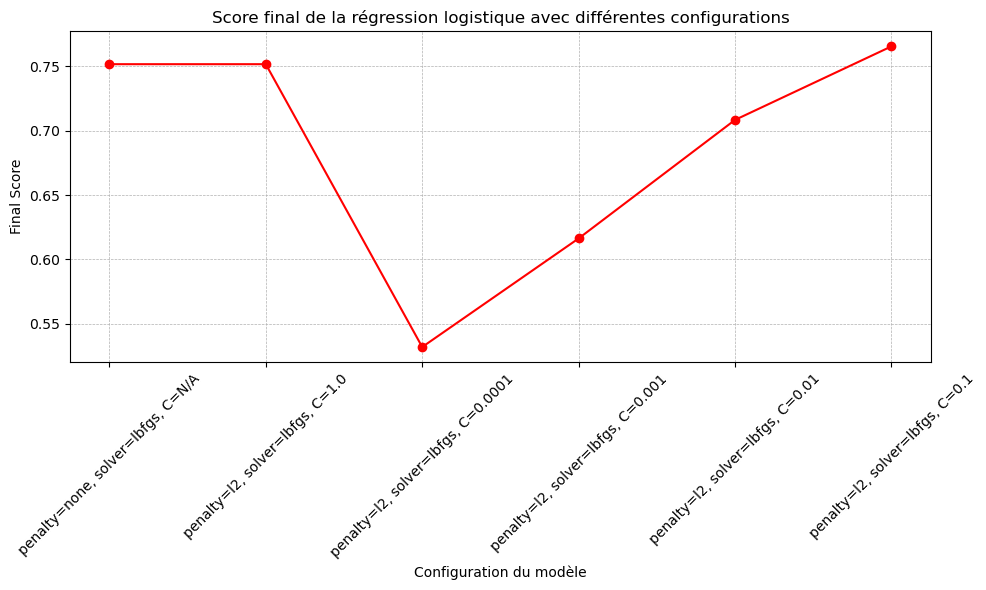

In [6]:
# Essaie de présentation graphique
from matplotlib import pyplot as plt

# Extraire les final scores
final_scores = [info['metrics']['final_score'] for config, info in results.items()]
labels = list(results.keys())

# Créer le graphique
plt.figure(figsize=(10, 6))
plt.plot(labels, final_scores, marker='o', linestyle='-', color='r')
plt.title('Score final de la régression logistique avec différentes configurations')
plt.xlabel('Configuration du modèle')
plt.ylabel('Final Score')
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

C:\Users\Mita\AppData\Local\Temp\ipykernel_4352\2168875221.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=45, ha="right")


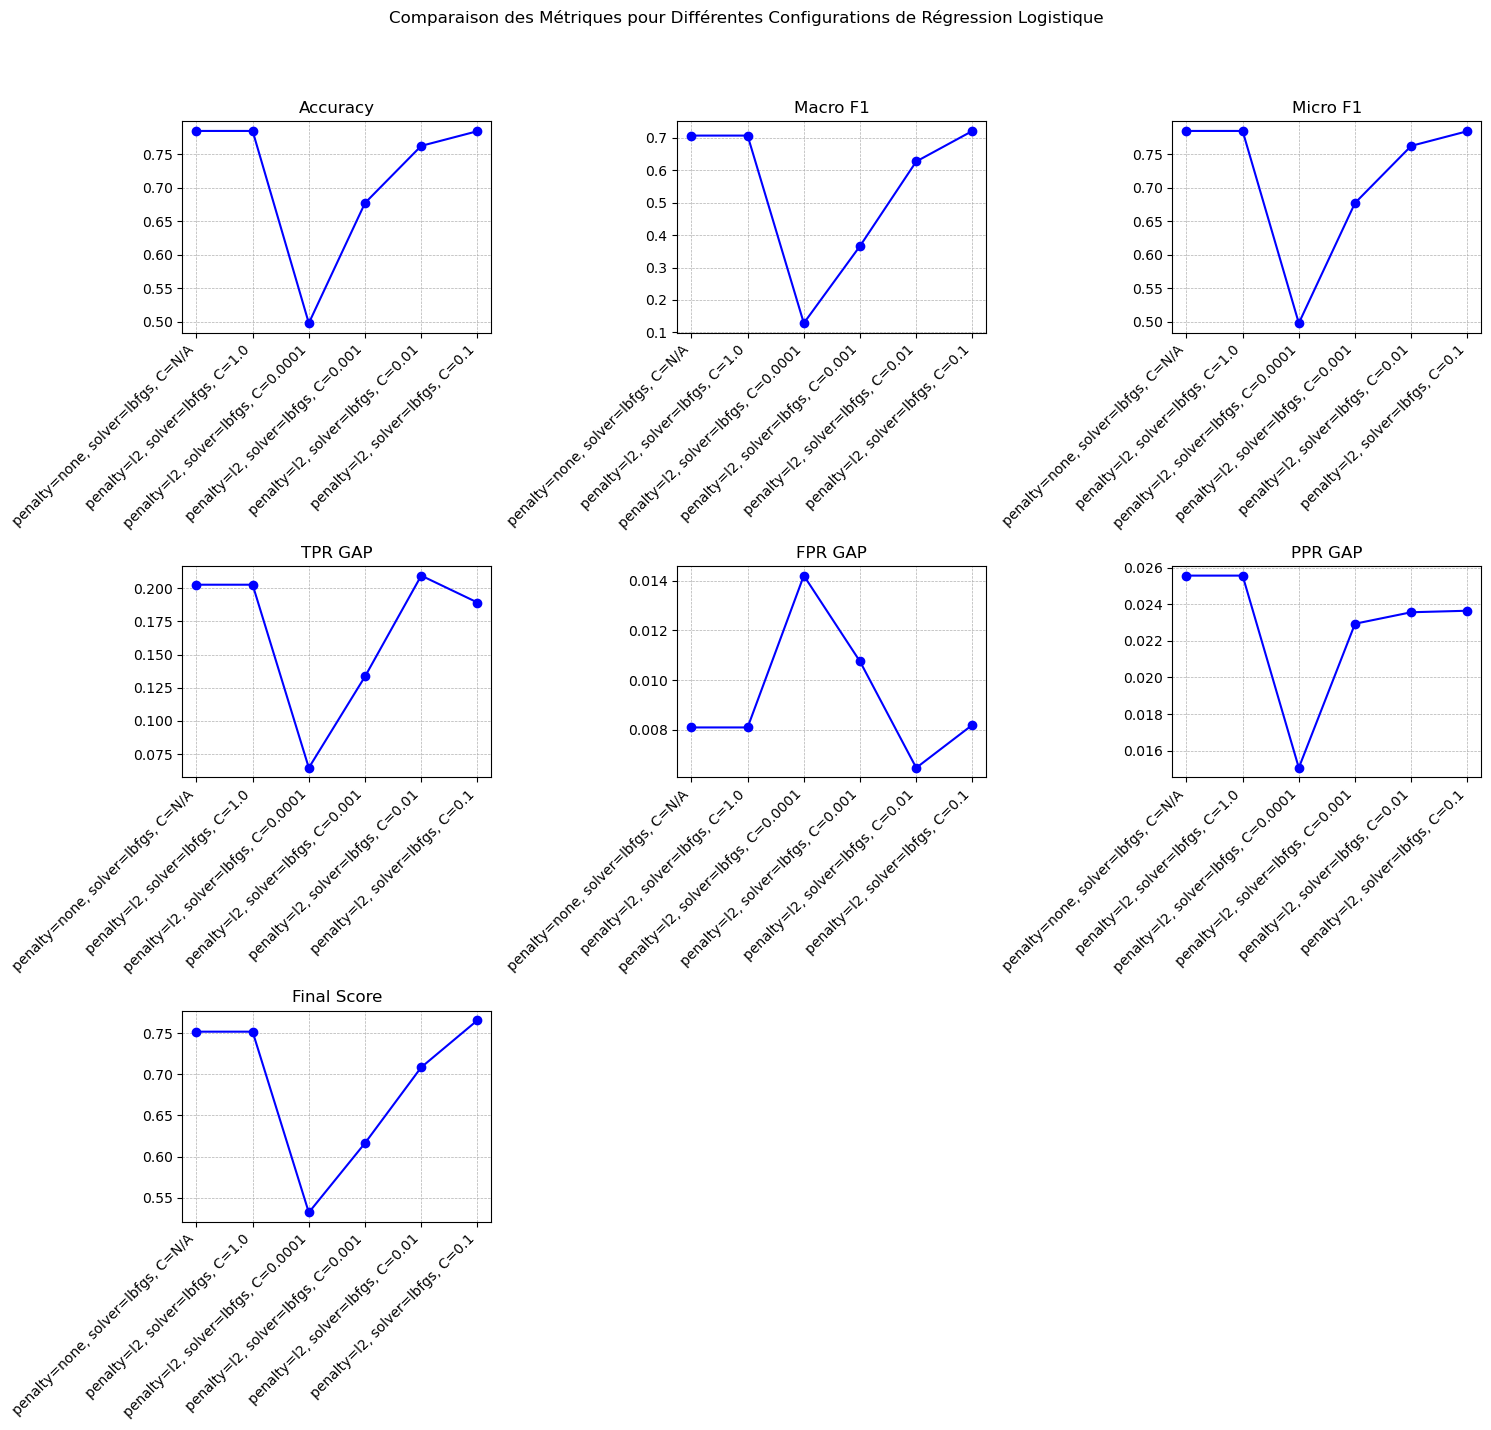

In [7]:
from matplotlib import pyplot as plt

# Initialiser une figure de grande taille pour contenir tous les sous-graphiques
fig, axs = plt.subplots(3, 3, figsize=(15, 15))  # 3x3 grid pour les 7 métriques + 2 espaces vides
fig.suptitle('Comparaison des Métriques pour Différentes Configurations de Régression Logistique')

# Liste des configurations et extraction des métriques
labels = list(results.keys())
accuracy = [info['metrics']['performance_metrics']['Accuracy'] for config, info in results.items()]
macro_f1 = [info['metrics']['performance_metrics']['Macro F1 Score'] for config, info in results.items()]
micro_f1 = [info['metrics']['performance_metrics']['Micro F1 Score'] for config, info in results.items()]
tpr_gap = [info['metrics']['fairness_metrics']['TPR_GAP'] for config, info in results.items()]
fpr_gap = [info['metrics']['fairness_metrics']['FPR_GAP'] for config, info in results.items()]
ppr_gap = [info['metrics']['fairness_metrics']['PPR_GAP'] for config, info in results.items()]
final_score = [info['metrics']['final_score'] for config, info in results.items()]

# Création des graphiques pour chaque métrique
metrics = [accuracy, macro_f1, micro_f1, tpr_gap, fpr_gap, ppr_gap, final_score]
metric_names = ['Accuracy', 'Macro F1', 'Micro F1', 'TPR GAP', 'FPR GAP', 'PPR GAP', 'Final Score']

for ax, metric, name in zip(axs.flatten(), metrics, metric_names):
    ax.plot(labels, metric, marker='o', linestyle='-', color='b')
    ax.set_title(name)
    ax.set_xticklabels(labels, rotation=45, ha="right")
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Masquer les axes vides restants
for i in range(7, 9):
    fig.delaxes(axs.flatten()[i])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Commentaire  
Le meilleur compromis entre performance et équité est obtenu avec une régularisation modérée (C=0.1). Cela donne une précision de 78.5% et un score F1 macro de 72.0%, pour un score final de 76.6%. Il réduit légèrement le TPR_GAP par rapport au modèle sans pénalité. Des valeurs de régularisation très faibles (C=0.0001) nuisent considérablement aux performances. D'autre part, l'absence de pénalité et une forte pénalité (C=1.0) donnent des résultats similaires mais légèrement moins bons que ceux obtenus avec C=0.1.

# Commentaire
Dans la régression logistique, lorsque nous utilisons la régularisation L2 pour ajuster notre modèle, la standardisation des données est utile. Cela signifie que nous mettons nos données à la même échelle en soustrayant la moyenne et en divisant par l'écart-type. Cette étape permet à toutes les variables d'avoir un impact similaire sur notre modèle, ce qui rend l'optimisation plus efficace et stable. En fin de compte, cela peut conduire à un modèle plus robuste et à des résultats plus faciles à interpréter.

# Régression logistique avec standartisation 

In [24]:
# Calcul des statistiques de base
statistiques = X_train.describe()

# Moyennes et écarts types de chaque feature
moyennes = statistiques.loc['mean']
ecarts_types = statistiques.loc['std']

# Critères de vérification : moyenne proche de 0 et écart type proche de 1
criteres_centrees = moyennes.abs().lt(0.01)  # lt pour "less than" vérifie si la valeur absolue de la moyenne est < 0.01
criteres_reduites = ecarts_types.between(0.99, 1.01)  # Vérifie si l'écart type est entre 0.99 et 1.01

# Vérification pour chaque feature
features_centrees_et_reduites = criteres_centrees & criteres_reduites

# Affichage des résultats
print("Features centrées et réduites :")
print(features_centrees_et_reduites)

# Nombre de features qui ne sont pas centrées ou réduites
num_features_non_standards = (~features_centrees_et_reduites).sum()
print(f"\nNombre de features non standardisées (centrées et réduites) : {num_features_non_standards}")

Features centrées et réduites :
0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

Nombre de features non standardisées (centrées et réduites) : 768


In [16]:
# Créer l'objet scaler
scaler = StandardScaler()

In [17]:
# Ajuster aux données d'entraînement et les transformer
X_train_normalise = scaler.fit_transform(X_train)
X_train_normalise

array([[ 0.9460965 ,  0.81982482,  1.2176666 , ..., -0.29246559,
        -0.51944925,  1.06712865],
       [ 1.62482385,  0.0166503 , -0.52834934, ..., -0.06447403,
        -0.20281087, -0.46333099],
       [ 0.02136989,  0.85196649,  0.79675493, ..., -0.08773842,
         0.70546796,  0.64704324],
       ...,
       [-0.71933961, -1.77375471,  0.18076657, ..., -0.13307346,
        -0.1584361 , -1.76413476],
       [ 0.63157713, -0.20958319,  0.85035563, ..., -0.38418186,
        -1.02635282,  1.04881504],
       [ 0.27163019,  0.04592038,  0.78811954, ..., -0.99470171,
        -0.64540075,  1.99326171]])

In [19]:
from scipy.stats import shapiro, normaltest

In [21]:
X_train_normalise = pd.DataFrame(X_train_normalise)

In [22]:
# Test de Shapiro-Wilk
print("Shapiro-Wilk Test Results:")
for column in X_train_normalise.columns:
    stat, p = shapiro(X_train_normalise[column])
    print(f'{column}: Statistics={stat:.3f}, p={p:.3f}')
    if p > 0.05:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')
    print()

Shapiro-Wilk Test Results:
0: Statistics=0.998, p=0.000
Sample does not look Gaussian (reject H0)

1: Statistics=0.999, p=0.000
Sample does not look Gaussian (reject H0)

2: Statistics=0.999, p=0.000
Sample does not look Gaussian (reject H0)

3: Statistics=0.998, p=0.000
Sample does not look Gaussian (reject H0)

4: Statistics=0.998, p=0.000
Sample does not look Gaussian (reject H0)

5: Statistics=0.995, p=0.000
Sample does not look Gaussian (reject H0)

6: Statistics=0.999, p=0.000
Sample does not look Gaussian (reject H0)

7: Statistics=0.999, p=0.000
Sample does not look Gaussian (reject H0)

8: Statistics=0.997, p=0.000
Sample does not look Gaussian (reject H0)

9: Statistics=1.000, p=0.000
Sample does not look Gaussian (reject H0)

10: Statistics=1.000, p=0.000
Sample does not look Gaussian (reject H0)

11: Statistics=0.999, p=0.000
Sample does not look Gaussian (reject H0)

12: Statistics=0.998, p=0.000
Sample does not look Gaussian (reject H0)

13: Statistics=0.998, p=0.000
Samp

C:\Users\Mita\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


81: Statistics=0.999, p=0.000
Sample does not look Gaussian (reject H0)

82: Statistics=0.998, p=0.000
Sample does not look Gaussian (reject H0)

83: Statistics=0.998, p=0.000
Sample does not look Gaussian (reject H0)

84: Statistics=0.997, p=0.000
Sample does not look Gaussian (reject H0)

85: Statistics=0.997, p=0.000
Sample does not look Gaussian (reject H0)

86: Statistics=0.996, p=0.000
Sample does not look Gaussian (reject H0)

87: Statistics=0.996, p=0.000
Sample does not look Gaussian (reject H0)

88: Statistics=0.996, p=0.000
Sample does not look Gaussian (reject H0)

89: Statistics=0.999, p=0.000
Sample does not look Gaussian (reject H0)

90: Statistics=0.999, p=0.000
Sample does not look Gaussian (reject H0)

91: Statistics=0.997, p=0.000
Sample does not look Gaussian (reject H0)

92: Statistics=1.000, p=0.000
Sample does not look Gaussian (reject H0)

93: Statistics=0.999, p=0.000
Sample does not look Gaussian (reject H0)

94: Statistics=0.997, p=0.000
Sample does not look 

207: Statistics=0.998, p=0.000
Sample does not look Gaussian (reject H0)

208: Statistics=0.998, p=0.000
Sample does not look Gaussian (reject H0)

209: Statistics=0.996, p=0.000
Sample does not look Gaussian (reject H0)

210: Statistics=0.995, p=0.000
Sample does not look Gaussian (reject H0)

211: Statistics=0.999, p=0.000
Sample does not look Gaussian (reject H0)

212: Statistics=0.996, p=0.000
Sample does not look Gaussian (reject H0)

213: Statistics=0.998, p=0.000
Sample does not look Gaussian (reject H0)

214: Statistics=0.999, p=0.000
Sample does not look Gaussian (reject H0)

215: Statistics=0.997, p=0.000
Sample does not look Gaussian (reject H0)

216: Statistics=0.998, p=0.000
Sample does not look Gaussian (reject H0)

217: Statistics=0.999, p=0.000
Sample does not look Gaussian (reject H0)

218: Statistics=0.999, p=0.000
Sample does not look Gaussian (reject H0)

219: Statistics=0.999, p=0.000
Sample does not look Gaussian (reject H0)

220: Statistics=1.000, p=0.000
Sample 

394: Statistics=0.996, p=0.000
Sample does not look Gaussian (reject H0)

395: Statistics=0.999, p=0.000
Sample does not look Gaussian (reject H0)

396: Statistics=0.999, p=0.000
Sample does not look Gaussian (reject H0)

397: Statistics=0.998, p=0.000
Sample does not look Gaussian (reject H0)

398: Statistics=0.986, p=0.000
Sample does not look Gaussian (reject H0)

399: Statistics=0.997, p=0.000
Sample does not look Gaussian (reject H0)

400: Statistics=0.998, p=0.000
Sample does not look Gaussian (reject H0)

401: Statistics=0.991, p=0.000
Sample does not look Gaussian (reject H0)

402: Statistics=1.000, p=0.000
Sample does not look Gaussian (reject H0)

403: Statistics=0.999, p=0.000
Sample does not look Gaussian (reject H0)

404: Statistics=0.998, p=0.000
Sample does not look Gaussian (reject H0)

405: Statistics=0.997, p=0.000
Sample does not look Gaussian (reject H0)

406: Statistics=0.998, p=0.000
Sample does not look Gaussian (reject H0)

407: Statistics=0.999, p=0.000
Sample 

582: Statistics=0.992, p=0.000
Sample does not look Gaussian (reject H0)

583: Statistics=1.000, p=0.000
Sample does not look Gaussian (reject H0)

584: Statistics=0.992, p=0.000
Sample does not look Gaussian (reject H0)

585: Statistics=0.998, p=0.000
Sample does not look Gaussian (reject H0)

586: Statistics=0.998, p=0.000
Sample does not look Gaussian (reject H0)

587: Statistics=0.996, p=0.000
Sample does not look Gaussian (reject H0)

588: Statistics=0.984, p=0.000
Sample does not look Gaussian (reject H0)

589: Statistics=0.999, p=0.000
Sample does not look Gaussian (reject H0)

590: Statistics=0.999, p=0.000
Sample does not look Gaussian (reject H0)

591: Statistics=0.999, p=0.000
Sample does not look Gaussian (reject H0)

592: Statistics=0.999, p=0.000
Sample does not look Gaussian (reject H0)

593: Statistics=0.999, p=0.000
Sample does not look Gaussian (reject H0)

594: Statistics=0.998, p=0.000
Sample does not look Gaussian (reject H0)

595: Statistics=0.989, p=0.000
Sample 

Il faut se méfier à ce test de Shapiro-Wilk dans la vérification de la normalité dans la grande taille de données comme ici. 

In [25]:
# Calcul des statistiques de base
statistiques = X_train_normalise.describe()

# Moyennes et écarts types de chaque feature
moyennes = statistiques.loc['mean']
ecarts_types = statistiques.loc['std']

# Critères de vérification : moyenne proche de 0 et écart type proche de 1
criteres_centrees = moyennes.abs().lt(0.01)  # lt pour "less than" vérifie si la valeur absolue de la moyenne est < 0.01
criteres_reduites = ecarts_types.between(0.99, 1.01)  # Vérifie si l'écart type est entre 0.99 et 1.01

# Vérification pour chaque feature
features_centrees_et_reduites = criteres_centrees & criteres_reduites

# Affichage des résultats
print("Features centrées et réduites :")
print(features_centrees_et_reduites)

# Nombre de features qui ne sont pas centrées ou réduites
num_features_non_standards = (~features_centrees_et_reduites).sum()
print(f"\nNombre de features non standardisées (centrées et réduites) : {num_features_non_standards}")

Features centrées et réduites :
0      True
1      True
2      True
3      True
4      True
       ... 
763    True
764    True
765    True
766    True
767    True
Length: 768, dtype: bool

Nombre de features non standardisées (centrées et réduites) : 0


Les variables sont maintenant centrées et réduites.

In [26]:
logistic_clf_4 = LogisticRegression(random_state=42, max_iter=10000, multi_class='multinomial', solver='lbfgs', penalty='l2', C=0.1)

In [27]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [28]:
logistic_with_reg_norm = train_and_evaluate(logistic_clf_4, X_train_normalise, Y_train, gender_train, cv)

In [29]:
logistic_with_reg_norm [1]

{'performance_metrics': {'Accuracy': 0.7657657657657657,
  'Macro F1 Score': 0.6849303849309943,
  'Micro F1 Score': 0.7657657657657657},
 'fairness_metrics': {'TPR_GAP': 0.17888499553048717,
  'FPR_GAP': 0.008301077801243405,
  'PPR_GAP': 0.0242958882630119},
 'final_score': 0.7530226947002536,
 'number_of_estimators': 'N/A'}

Il n'y a pas l'amélioration attendu.